# Q3 Code

In [1]:
# Data (years 1930–1980 for 6-point, degree-5 Lagrange interpolation)
years = [1930, 1940, 1950, 1960, 1970, 1980]
pop   = [28.5, 32.4, 37.6, 45.1, 55.8, 69.7]   # in Crores

x0,x1,x2,x3,x4,x5 = years

# Precompute denominators for each L_i
D0 = (x0-x1)*(x0-x2)*(x0-x3)*(x0-x4)*(x0-x5)
D1 = (x1-x0)*(x1-x2)*(x1-x3)*(x1-x4)*(x1-x5)
D2 = (x2-x0)*(x2-x1)*(x2-x3)*(x2-x4)*(x2-x5)
D3 = (x3-x0)*(x3-x1)*(x3-x2)*(x3-x4)*(x3-x5)
D4 = (x4-x0)*(x4-x1)*(x4-x2)*(x4-x3)*(x4-x5)
D5 = (x5-x0)*(x5-x1)*(x5-x2)*(x5-x3)*(x5-x4)

def l_zero_x(x):  # L0(x)
    return ((x-x1)*(x-x2)*(x-x3)*(x-x4)*(x-x5))/D0

def l_one_x(x):   # L1(x)
    return ((x-x0)*(x-x2)*(x-x3)*(x-x4)*(x-x5))/D1

def l_two_x(x):   # L2(x)
    return ((x-x0)*(x-x1)*(x-x3)*(x-x4)*(x-x5))/D2

def l_three_x(x): # L3(x)
    return ((x-x0)*(x-x1)*(x-x2)*(x-x4)*(x-x5))/D3

def l_four_x(x):  # L4(x)
    return ((x-x0)*(x-x1)*(x-x2)*(x-x3)*(x-x5))/D4

def l_five_x(x):  # L5(x)
    return ((x-x0)*(x-x1)*(x-x2)*(x-x3)*(x-x4))/D5
def P(x):
    return (l_zero_x(x)*pop[0] + l_one_x(x)*pop[1] + l_two_x(x)*pop[2] + l_three_x(x)*pop[3] + l_four_x(x)*pop[4] + l_five_x(x)*pop[5])
#Sanity Check
print(P(1930), P(1940)) 

# --- Prediction table & MSE for extrapolated years (1980–2020) ---

# Known actual populations (Cr.) including extrapolation targets
actual_years  = [1990, 2000, 2010, 2020]
actual_pops   = [87.1, 105.7, 124.1, 139.6]

# Predicted via degree-5 Lagrange polynomial built on 1930–1980 data
pred_pops = [P(y) for y in actual_years]

# Print table header
print(f"{'Year':>6} | {'Actual':>10} | {'Predicted':>12} | {'Error (Pred-Act)':>18}")
print("-"*54)
for yr, act, pred in zip(actual_years, actual_pops, pred_pops):
    print(f"{yr:6d} | {act:10.4f} | {pred:12.4f} | {pred-act:18.4f}")

# Mean Squared Error (you asked: single loop; include all rows)
sse = 0.0
for i in range(len(actual_years)):
    diff = pred_pops[i] - actual_pops[i]   # (1st column - 0th column per your description)
    sse += diff*diff
mse = sse / len(actual_years)
print("\nMean Squared Error:", mse)
# Brief discussion:
# This high-degree (5) Lagrange polynomial exactly fits the 1930–1980 data
# but extrapolation (beyond 1980) can be unreliable and can show growing deviation.
# Population growth is better modeled with logistic / piecewise / lower-degree or
# demographic models; pure polynomial extrapolation is generally not a good idea


28.5 32.4
  Year |     Actual |    Predicted |   Error (Pred-Act)
------------------------------------------------------
  1990 |    87.1000 |      85.1000 |            -2.0000
  2000 |   105.7000 |      97.8000 |            -7.9000
  2010 |   124.1000 |     100.3000 |           -23.8000
  2020 |   139.6000 |      81.0000 |           -58.6000

Mean Squared Error: 1016.7024999998857


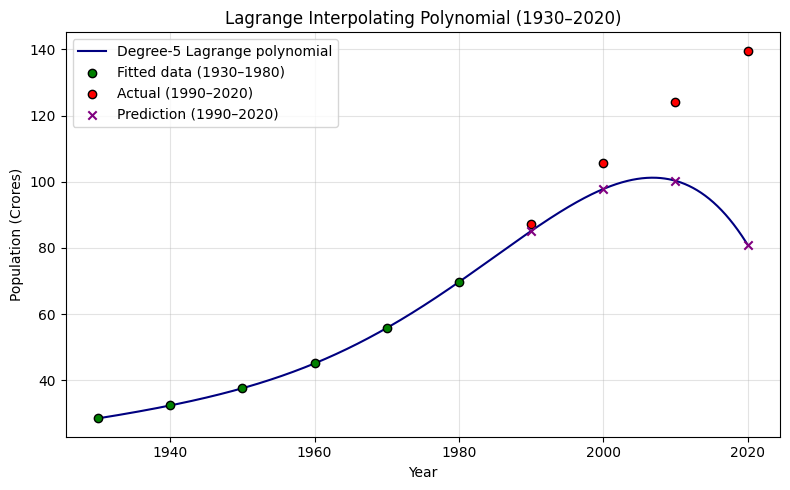

In [3]:
# Plot polynomial (1930–2020) and actual data points (ONLY the main figure)

import numpy as np
import matplotlib.pyplot as plt

years_base = [1930, 1940, 1950, 1960, 1970, 1980]
pops_base  = [28.5, 32.4, 37.6, 45.1, 55.8, 69.7]

future_years  = [1990, 2000, 2010, 2020]
future_actual = [87.1, 105.7, 124.1, 139.6]

# Rebuild P_poly if missing
if 'P_poly' not in globals():
    P_poly = np.poly1d([0.0])
    for i, xi in enumerate(years_base):
        Li = np.poly1d([1.0])
        for j, xj in enumerate(years_base):
            if j == i: continue
            Li *= np.poly1d([1.0, -xj]) / (xi - xj)
        P_poly += pops_base[i] * Li

x_dense = np.linspace(1930, 2020, 800)
y_dense = P_poly(x_dense)

plt.figure(figsize=(8,5))
plt.plot(x_dense, y_dense, color='navy', label='Degree-5 Lagrange polynomial')
plt.scatter(years_base, pops_base, color='green', edgecolor='k', zorder=5, label='Fitted data (1930–1980)')
plt.scatter(future_years, future_actual, color='red', edgecolor='k', zorder=6, label='Actual (1990–2020)')
plt.scatter(future_years, [P_poly(y) for y in future_years],
            marker='x', color='purple', zorder=7, label='Prediction (1990–2020)')
plt.xlabel('Year')
plt.ylabel('Population (Crores)')
plt.title('Lagrange Interpolating Polynomial (1930–2020)')
plt.grid(alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
# Pretty print full Lagrange interpolating polynomial (degree 5)

import numpy as np

years = [1930, 1940, 1950, 1960, 1970, 1980]
pop   = [28.5, 32.4, 37.6, 45.1, 55.8, 69.7]

# Build polynomial P(x) = sum y_i * L_i(x) using numpy.poly1d
P_poly = np.poly1d([0.0])
for i, xi in enumerate(years):
    Li = np.poly1d([1.0])
    for j, xj in enumerate(years):
        if j == i:
            continue
        Li *= np.poly1d([1.0, -xj]) / (xi - xj)
    P_poly += pop[i] * Li

coeffs = P_poly.c  # descending powers: x^5 ... x^0

def format_poly(coeffs, var='x'):
    deg = len(coeffs) - 1
    terms = []
    for k, a in enumerate(coeffs):
        p = deg - k
        if abs(a) < 1e-12:
            continue
        if p == 0:
            term = f"{a:.10f}"
        elif p == 1:
            term = f"{a:.10f}{var}"
        else:
            term = f"{a:.10f}{var}^{p}"
        terms.append(term)
    if not terms:
        return "0"
    # Combine with +/−, cleaning signs
    expr = terms[0]
    for t in terms[1:]:
        if t.startswith('-'):
            expr += " - " + t[1:]
        else:
            expr += " + " + t
    return f"P({var}) = {expr}"

print("Degree-5 Lagrange interpolating polynomial (in x = year):")
print(format_poly(coeffs, 'x'))
print()

# Shifted variable t = x - 1930 to reduce coefficient magnitude
shift = years[0]
# Substitute x = t + shift
t_poly = P_poly(np.poly1d([1.0, shift]))  # yields polynomial in t
t_coeffs = t_poly.c  # descending powers of t

print("Same polynomial with t = x - 1930:")
print(format_poly(t_coeffs, 't'))
print()

# Optional SymPy exact / pretty form
try:
    import sympy as sp
    x = sp.Symbol('x')
    expr = sp.expand(sum(
        pop[i] * sp.prod([(x - years[j])/(years[i] - years[j])
                          for j in range(len(years)) if j != i])
        for i in range(len(years))
    ))
    print("SymPy expanded exact form:")
    print(expr)
    print("\nPretty form:")
    print(sp.pretty(expr))
except Exception as e:
    print("SymPy not available (skipping symbolic pretty print).")

# Quick verification at original data points
print("\nCheck P(year_i) vs data:")
for xi, yi in zip(years, pop):
    approx = P_poly(xi)
    print(f"P({xi}) = {approx:.10f}  (data {yi})  error={approx-yi:+.2e}")

Degree-5 Lagrange interpolating polynomial (in x = year):
P(x) = -0.0000000667x^5 + 0.0006495833x^4 - 2.5315583333x^3 + 4932.6340416677x^2 - 4805168.5835002065x + 1872267764.7999267578

Same polynomial with t = x - 1930:
P(t) = -0.0000000667t^5 + 0.0000062500t^4 - 0.0000416667t^3 + 0.0043749983t^2 + 0.3448326613t + 28.5007488728

SymPy expanded exact form:
-6.66666666666638e-8*x**5 + 0.000649583333333315*x**4 - 2.53155833333358*x**3 + 4932.63404166652*x**2 - 4805168.58349991*x + 1872267764.79993

Pretty form:
                       5                         4                     3       ↪
- 6.66666666666638e-8⋅x  + 0.000649583333333315⋅x  - 2.53155833333358⋅x  + 493 ↪

↪                2                                        
↪ 2.63404166652⋅x  - 4805168.58349991⋅x + 1872267764.79993

Check P(year_i) vs data:
P(1930) = 28.5007488728  (data 28.5)  error=+7.49e-04
P(1940) = 32.4007408619  (data 32.4)  error=+7.41e-04
P(1950) = 37.6007328033  (data 37.6)  error=+7.33e-04
P(1960) = 45.100